<a href="https://colab.research.google.com/github/SandeepGandham4/Data-Science-Intern-Assignment-Zeotap/blob/main/Sandeep_Gandham_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3: Customer Segmentation / Clustering

<ipython-input-2-237f1f9219cc>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df['Region'].fillna('Unknown', inplace=True)


Davies-Bouldin Index: 1.1207601353684324
Silhouette Score: 0.25297890174428245


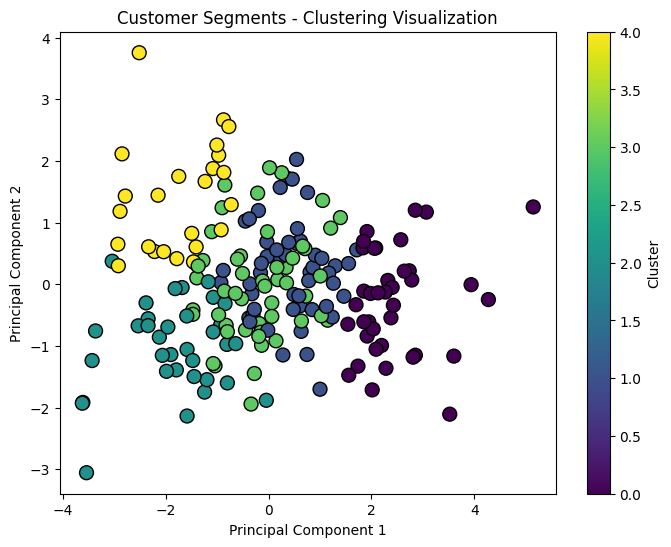

Number of Clusters: 5
Davies-Bouldin Index: 1.1207601353684324
Silhouette Score: 0.25297890174428245


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

# Load the datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

# Preprocess customer data
customers_df['Region'].fillna('Unknown', inplace=True)
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['CustomerTenure'] = (pd.to_datetime('today') - customers_df['SignupDate']).dt.days

# Preprocess transaction data
merged_df = pd.merge(transactions_df, products_df[['ProductID', 'Category']], on='ProductID', how='left')
customer_transactions = merged_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    unique_products=('ProductID', 'nunique'),
    average_price=('Price', 'mean')
).reset_index()

# Merge customer profile data with transaction data
customer_profile = pd.merge(customers_df, customer_transactions, on='CustomerID')

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profile[['CustomerTenure', 'total_spent', 'transaction_count', 'unique_products', 'average_price']])
scaled_customer_data = pd.DataFrame(scaled_features, columns=['CustomerTenure', 'total_spent', 'transaction_count', 'unique_products', 'average_price'])

# Clustering with K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_customer_data)

# Clustering metrics
db_index = davies_bouldin_score(scaled_customer_data, customer_profile['Cluster'])
silhouette_avg = silhouette_score(scaled_customer_data, customer_profile['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

# Visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_customer_data)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=customer_profile['Cluster'], cmap='viridis', edgecolors='k', s=100)
plt.title("Customer Segments - Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Final report
num_clusters = kmeans.n_clusters
print(f"Number of Clusters: {num_clusters}")
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')
